In [2]:
import pandas as pd

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [3]:
from functions import get_clean_data, one_hot_encode, create_interactions, replace_, give_regression

In [4]:
mojo = pd.read_csv('data/mojo.csv')
imdb = pd.read_csv('data/imdb.csv')

df = get_clean_data(mojo, imdb)
df = one_hot_encode('genres', df)
TrainScaled, TestScaled, y_train, y_test = give_regression(df)

/Users/liamisaacs/Desktop/github repositories/metis-project2/functions.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[option] = df[x].str.contains(option).astype('int')
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Baseline got!
Interactions between genres done!
Merge back in iteractions to X_trian


/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Distributor is one-hot-encoded
Linear regression (on TRAINING DATA) with genre-genre interaction terms AND OHE of distributor val R^2: 0.323
Linear regression (on TEST DATA) with genre-genre interaction terms AND OHE of distributor val R^2: 0.529


TypeError: unsupported operand type(s) for -: 'float' and 'str'

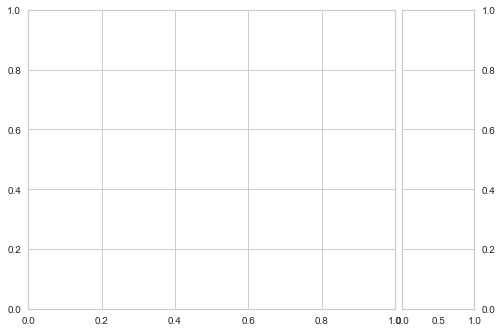

In [5]:
ridge_cv_5_fold = RidgeCV(cv=5)
visualizer = ResidualsPlot(ridge_cv_5_fold, hist=True)
visualizer.fit(TrainScaled, y_train)  # Fit the training data to the visualizer
visualizer.score(TestScaled, y_test)  # Score on our test data
visualizer.show()                     # Finalize and render the figure